## Dataset Processing for Image Data

In [5]:
# Importing necessary libraries

import numpy as np  # NumPy for numerical operations on arrays and matrices
import os  # Provides functions to interact with the operating system, such as file and directory handling
from pathlib import Path  # A module for handling and manipulating file system paths in an object-oriented way

import matplotlib.pyplot as plt  # Matplotlib for plotting and visualizing data
from keras.preprocessing import image  # Keras image module for image preprocessing like loading, converting, and resizing images


In [6]:
p = Path("Images/")  # Define the path to the "Images" directory
dirs = p.glob("*")  # Get all directories (or files) inside the "Images" folder
labels_dict = {'cat': 0, 'dog': 1}  # Dictionary to map folder names ('cat' or 'dog') to numeric labels

image_data = []  # List to store image data (arrays)
labels = []  # List to store corresponding labels

# Iterate through each folder (category) in the "Images" directory
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1][:-1]  # Extract label name from folder path (either 'cat' or 'dog')

    # Iterate through each image in the folder with '.jpg' extension
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path, target_size=(32,32))  # Load image and resize to (32x32)
        img_array = image.img_to_array(img)  # Convert image to an array format
        image_data.append(img_array)  # Add image array to image_data list
        labels.append(labels_dict[label])  # Add corresponding label (0 or 1) to labels list


In [7]:
print(len(image_data))
print(len(labels))

404
404


In [8]:
type(image_data)

list

In [9]:
type(labels)

list

In [10]:
print((labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
## Convert data into numpy array

# Convert the list of image data into a NumPy array and normalize the pixel values by dividing by 255.0 
# (to scale values between 0 and 1 for easier computation)
image_data = np.array(image_data, dtype='float32') / 255.0  

# Convert the list of labels into a NumPy array
labels = np.array(labels)

# Print the shape of the image_data and labels arrays
# image_data.shape: should be (num_images, 32, 32, 3) where 32x32 is the image size and 3 is the color channels (RGB)
# labels.shape: should be (num_images,) where each entry is the label corresponding to the image
print(image_data.shape, labels.shape)


(404, 32, 32, 3) (404,)


In [12]:
## Randomly shuffle data

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

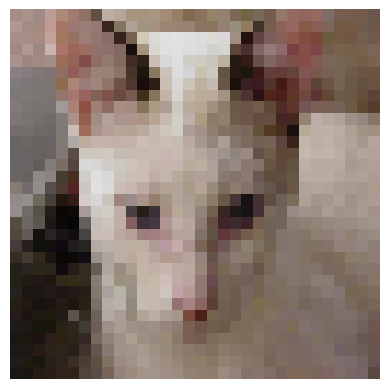

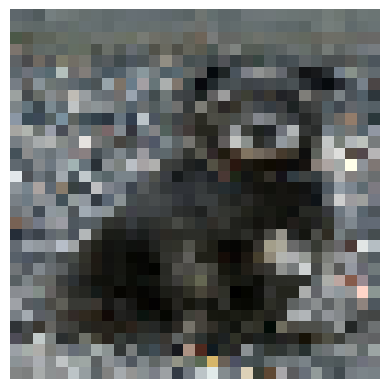

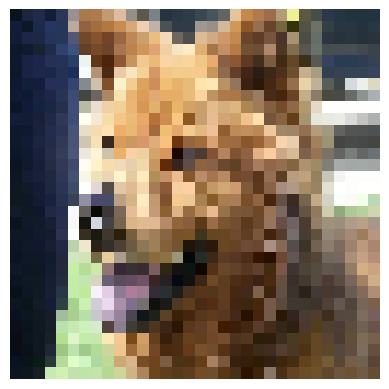

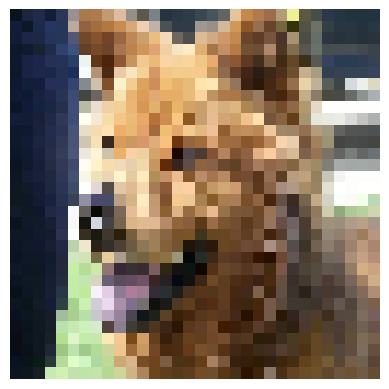

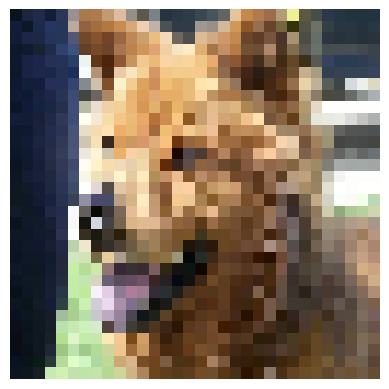

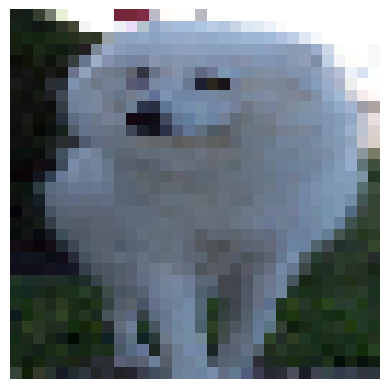

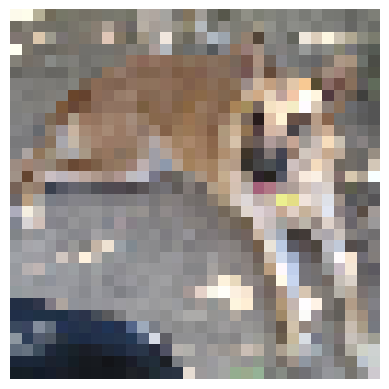

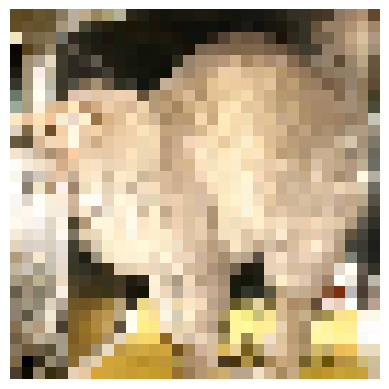

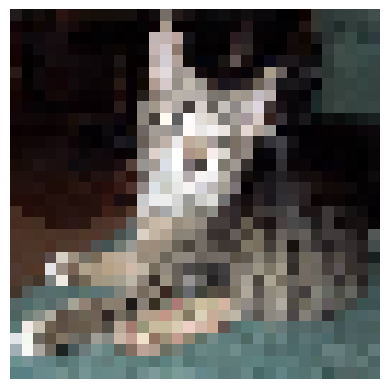

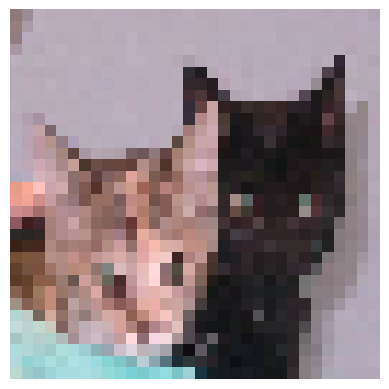

In [13]:
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

In [14]:
## Data conversion for classification

M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(404, 3072)
(404,)


## Using scikit

In [15]:
from sklearn import svm

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# Define the SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
ypred_sklearn = svm_classifier.predict(X_test)

# Calculate and print accuracy on the test set
accuracy = accuracy_score(y_test, ypred_sklearn)
print(f"Test set accuracy: {accuracy:.4f}")

# Optionally, evaluate accuracy on the training data as well
train_accuracy = svm_classifier.score(X_train, y_train)
print(f"Training set accuracy: {train_accuracy:.4f}")

Test set accuracy: 0.4691
Training set accuracy: 0.8173


## Confusion Matrix

Confusion Matrix:
 [[22 22]
 [21 16]]


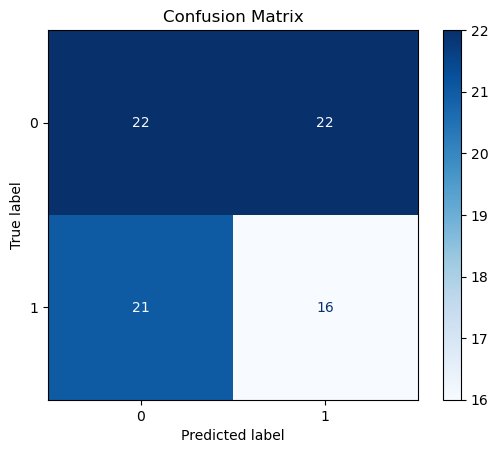

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix using test data
cnf_matrix_sklearn = confusion_matrix(y_test, ypred_sklearn)
print("Confusion Matrix:\n", cnf_matrix_sklearn)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_sklearn, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Decision Classifier, SVM and KNN


SVM Test set accuracy: 0.4691
KNN Test set accuracy: 0.4938
Decision Tree Test set accuracy: 0.5062
SVM Confusion Matrix:
 [[22 22]
 [21 16]]


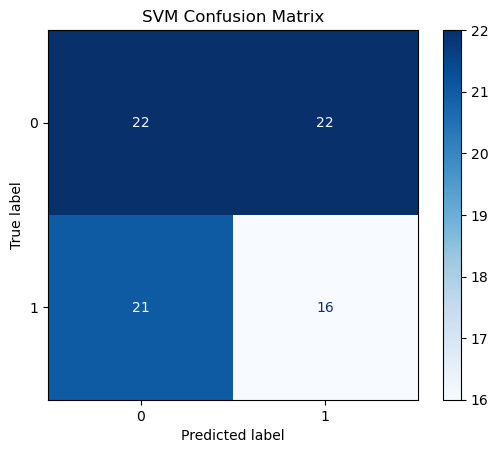

KNN Confusion Matrix:
 [[19 25]
 [16 21]]


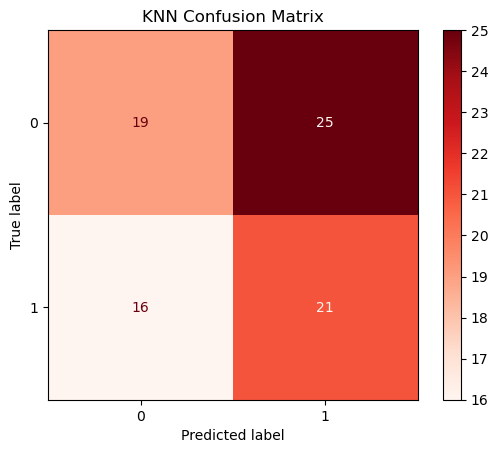

Decision Tree Confusion Matrix:
 [[26 18]
 [22 15]]


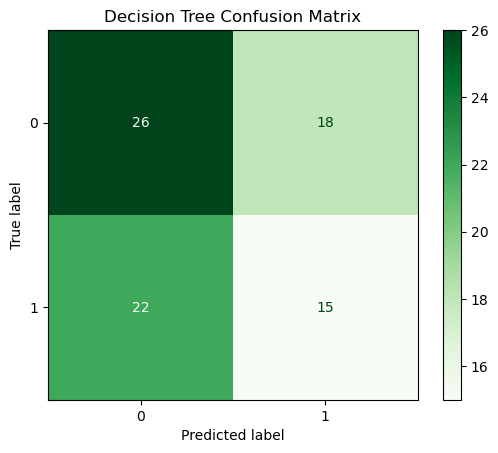

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

# --- SVM Classifier ---
# Define the SVM classifier with a linear kernel
svm_classifier = svm.SVC(kernel='linear', C=1.0)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
ypred_svm = svm_classifier.predict(X_test)

# Calculate and print accuracy on the test set for SVM
accuracy_svm = accuracy_score(y_test, ypred_svm)
print(f"SVM Test set accuracy: {accuracy_svm:.4f}")

# --- KNN Classifier ---
# Define the KNN classifier (with k=5 by default)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions using KNN
ypred_knn = knn_classifier.predict(X_test)

# Calculate and print accuracy for KNN
accuracy_knn = accuracy_score(y_test, ypred_knn)
print(f"KNN Test set accuracy: {accuracy_knn:.4f}")

# --- Decision Tree Classifier ---
# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions using Decision Tree
ypred_dt = dt_classifier.predict(X_test)

# Calculate and print accuracy for Decision Tree
accuracy_dt = accuracy_score(y_test, ypred_dt)
print(f"Decision Tree Test set accuracy: {accuracy_dt:.4f}")

# --- Confusion Matrices ---
# Compute and plot confusion matrix for SVM
cnf_matrix_svm = confusion_matrix(y_test, ypred_svm)
print("SVM Confusion Matrix:\n", cnf_matrix_svm)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_svm, display_labels=[0, 1])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.show()

# Compute and plot confusion matrix for KNN
cnf_matrix_knn = confusion_matrix(y_test, ypred_knn)
print("KNN Confusion Matrix:\n", cnf_matrix_knn)

disp_knn = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_knn, display_labels=[0, 1])
disp_knn.plot(cmap=plt.cm.Reds)
plt.title('KNN Confusion Matrix')
plt.show()

# Compute and plot confusion matrix for Decision Tree
cnf_matrix_dt = confusion_matrix(y_test, ypred_dt)
print("Decision Tree Confusion Matrix:\n", cnf_matrix_dt)

disp_dt = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_dt, display_labels=[0, 1])
disp_dt.plot(cmap=plt.cm.Greens)
plt.title('Decision Tree Confusion Matrix')
plt.show()
